<a href="https://colab.research.google.com/github/Jnanasagara/machine-learning-lab/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1

In [1]:
import numpy as np

# Summation Unit
def summation(inputs, weights, bias):
    #Computes weighted sum: Σ(wi*xi) + bias
    return np.dot(inputs, weights) + bias

# Activation functions
def step(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Error Comparator
def error(y_true, y_pred):
    """Returns error value (difference)."""
    return y_true - y_pred


A2

Final weights: [0.1  0.05]
Final bias: -0.10000000000000765
Epochs to converge: 130


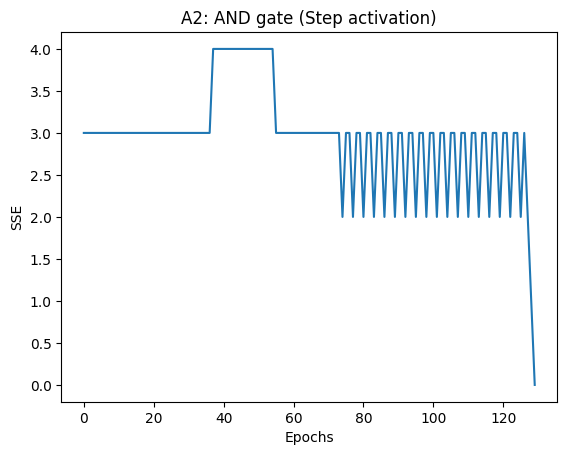

In [3]:
import matplotlib.pyplot as plt

X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])

def train_perceptron_discrete(X, y, activation_func, w_init, b_init, lr=0.05, max_epochs=1000, tol=0.002):
    w = w_init.copy().astype(float)
    b = float(b_init)
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            net = summation(xi, w, b)
            y_pred = activation_func(net)
            err = target - y_pred
            w += lr * err * xi
            b += lr * err
            total_error += err**2
        errors.append(total_error)
        if total_error <= tol:
            break
    return w, b, errors, epoch+1

# Initial weights/bias
w0, w1, w2 = 10, 0.2, -0.75
final_w, final_b, errors, epochs = train_perceptron_discrete(X_and, y_and, step, np.array([w1,w2]), w0)

print("Final weights:", final_w)
print("Final bias:", final_b)
print("Epochs to converge:", epochs)

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.title("A2: AND gate (Step activation)")
plt.show()

A3

In [4]:
def train_perceptron_continuous(X, y, activation, derivative, w_init, b_init, lr=0.05, max_epochs=1000, tol=0.002):
    w = w_init.copy().astype(float)
    b = float(b_init)
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X, y):
            net = summation(xi, w, b)
            out = activation(net)
            err = target - out
            total_error += err**2
            grad = -2 * err * derivative(net)
            w -= lr * grad * xi
            b -= lr * grad
        errors.append(total_error)
        if total_error <= tol:
            break
    return w, b, errors, epoch+1

# Bipolar Step
y_bipolar = np.where(y_and==0,-1,1)
wb, bb, errb, epb = train_perceptron_discrete(X_and, y_bipolar, bipolar_step, np.array([w1,w2]), w0)

# Sigmoid
ws, bs, errs, eps = train_perceptron_continuous(X_and, y_and, sigmoid, sigmoid, np.array([w1,w2]), w0)

# ReLU
wr, br, errr, epr = train_perceptron_continuous(X_and, y_and, relu, relu, np.array([w1,w2]), w0)

print("Bipolar Step -> Epochs:", epb)
print("Sigmoid -> Epochs:", eps)
print("ReLU -> Epochs:", epr)

Bipolar Step -> Epochs: 68
Sigmoid -> Epochs: 1000
ReLU -> Epochs: 1000


A4

Learning rates vs Epochs: [(0.1, 68), (0.2, 37), (0.30000000000000004, 23), (0.4, 23), (0.5, 19), (0.6000000000000001, 19), (0.7000000000000001, 15), (0.8, 14), (0.9, 13), (1.0, 12)]


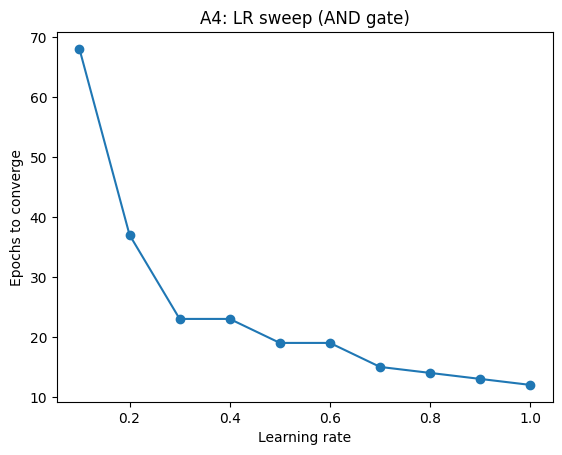

In [5]:
lr_list = [0.1*i for i in range(1,11)]
epochs_list = []

for lr in lr_list:
    _,_,_,ep = train_perceptron_discrete(X_and, y_and, step, np.array([w1,w2]), w0, lr=lr)
    epochs_list.append(ep)

print("Learning rates vs Epochs:", list(zip(lr_list, epochs_list)))

plt.plot(lr_list, epochs_list, marker='o')
plt.xlabel("Learning rate")
plt.ylabel("Epochs to converge")
plt.title("A4: LR sweep (AND gate)")
plt.show()

A5

XOR (Step perceptron) epochs: 1000


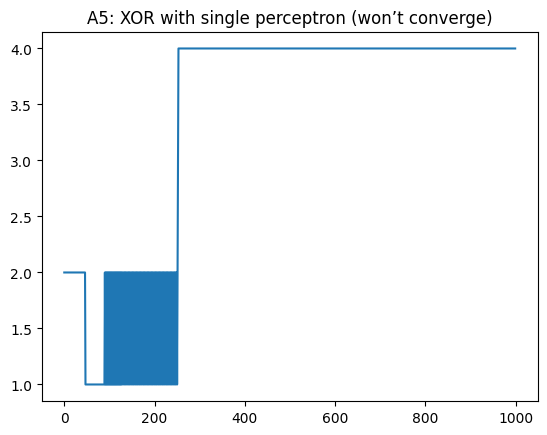

In [6]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

wx, bx, errx, epx = train_perceptron_discrete(X_xor, y_xor, step, np.array([w1,w2]), w0)
print("XOR (Step perceptron) epochs:", epx)

plt.plot(errx)
plt.title("A5: XOR with single perceptron (won’t converge)")
plt.show()

A6

In [7]:
data = np.array([
    [20,6,2,386,1],
    [16,3,6,289,1],
    [27,6,2,393,1],
    [19,1,2,110,0],
    [24,4,2,280,1],
    [22,1,5,167,0],
    [15,4,2,271,1],
    [18,4,2,274,1],
    [21,1,4,148,0],
    [16,2,4,198,0]
], dtype=float)

X_cust, y_cust = data[:,:4], data[:,4]
Xc_mean, Xc_std = X_cust.mean(axis=0), X_cust.std(axis=0)+1e-8
Xc = (X_cust - Xc_mean) / Xc_std

wc, bc, errc, epc = train_perceptron_continuous(Xc, y_cust, sigmoid, sigmoid, np.zeros(4), 0.0, lr=0.1, max_epochs=2000)
preds = (sigmoid(Xc.dot(wc)+bc) >= 0.5).astype(int)
acc = (preds==y_cust).mean()

print("A6: Customer perceptron accuracy:", acc)

A6: Customer perceptron accuracy: 1.0


A7

In [8]:
from numpy.linalg import pinv

X_aug = np.hstack([X_cust, np.ones((X_cust.shape[0],1))])
w_aug = pinv(X_aug) @ y_cust
w_pinv, b_pinv = w_aug[:-1], w_aug[-1]

preds_pinv = (X_cust.dot(w_pinv)+b_pinv >= 0.5).astype(int)
acc_pinv = (preds_pinv==y_cust).mean()

print("A7: Pseudo-inverse accuracy:", acc_pinv)

A7: Pseudo-inverse accuracy: 1.0


A8

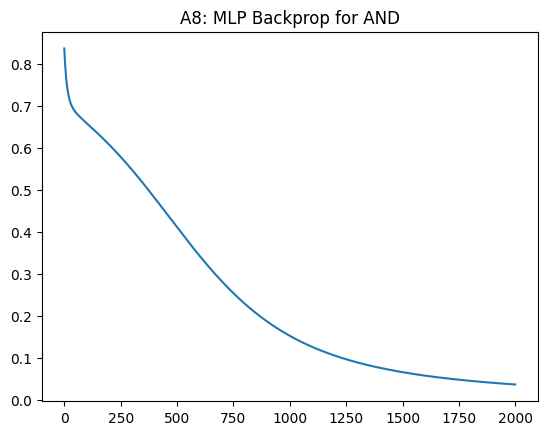

In [9]:
class SimpleMLP:
    def __init__(self, n_input=2, n_hidden=2, n_output=1, lr=0.05):
        rng = np.random.RandomState(1)
        self.W1 = rng.randn(n_hidden, n_input)*0.5
        self.b1 = np.zeros(n_hidden)
        self.W2 = rng.randn(n_output, n_hidden)*0.5
        self.b2 = np.zeros(n_output)
        self.lr = lr

    def forward(self, x):
        self.z1 = self.W1 @ x + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = self.W2 @ self.a1 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def train(self, X, Y, max_epochs=2000, tol=0.002):
        errors = []
        for epoch in range(max_epochs):
            sse_epoch = 0
            dW1 = np.zeros_like(self.W1)
            db1 = np.zeros_like(self.b1)
            dW2 = np.zeros_like(self.W2)
            db2 = np.zeros_like(self.b2)
            for x,y in zip(X,Y):
                out = self.forward(x)
                err = y - out
                sse_epoch += np.sum(err**2)
                delta2 = -2*err*out*(1-out)
                dW2 += np.outer(delta2, self.a1)
                db2 += delta2
                delta1 = (self.W2.T @ delta2)*self.a1*(1-self.a1)
                dW1 += np.outer(delta1, x)
                db1 += delta1
            self.W2 -= self.lr*dW2
            self.b2 -= self.lr*db2
            self.W1 -= self.lr*dW1
            self.b1 -= self.lr*db1
            errors.append(sse_epoch)
            if sse_epoch <= tol: break
        return errors

X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_and = np.array([[0],[0],[0],[1]])
mlp_and = SimpleMLP()
errs_and = mlp_and.train(X_and, Y_and)
plt.plot(errs_and)
plt.title("A8: MLP Backprop for AND")
plt.show()

A9

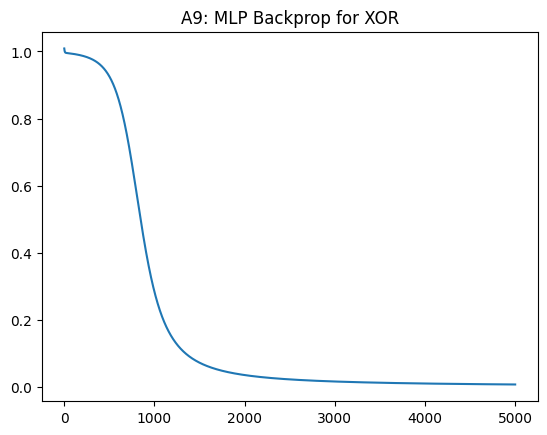

In [10]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_xor = np.array([[0],[1],[1],[0]])

mlp_xor = SimpleMLP(n_input=2, n_hidden=4, n_output=1, lr=0.1)
errs_xor = mlp_xor.train(X_xor, Y_xor, max_epochs=5000)

plt.plot(errs_xor)
plt.title("A9: MLP Backprop for XOR")
plt.show()

A10

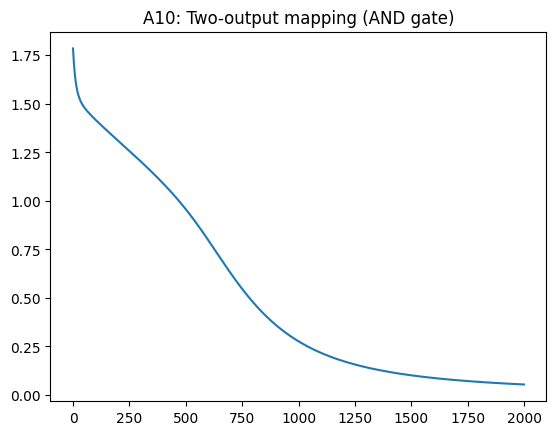

In [11]:
def prepare_two_output(y):
    return np.array([[1,0] if val==0 else [0,1] for val in y])

y_two = prepare_two_output([0,0,0,1])
mlp_two = SimpleMLP(n_input=2, n_hidden=3, n_output=2, lr=0.05)
errs_two = mlp_two.train(X_and, y_two, max_epochs=2000)

plt.plot(errs_two)
plt.title("A10: Two-output mapping (AND gate)")
plt.show()

A11

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# AND
y_and = np.array([0,0,0,1])
clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=2000)
clf_and.fit(X_and, y_and)
print("A11 AND acc:", accuracy_score(y_and, clf_and.predict(X_and)))

# XOR
y_xor = np.array([0,1,1,0])
clf_xor = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=5000)
clf_xor.fit(X_xor, y_xor)
print("A11 XOR acc:", accuracy_score(y_xor, clf_xor.predict(X_xor)))

A11 AND acc: 0.75
A11 XOR acc: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


A12

In [13]:
clf_cust = MLPClassifier(hidden_layer_sizes=(8,4), activation='logistic', max_iter=5000)
clf_cust.fit(Xc, y_cust)
print("A12 Customer acc:", accuracy_score(y_cust, clf_cust.predict(Xc)))

A12 Customer acc: 1.0
